In [1]:
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import seaborn as sns
import sys


sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

cm_to_in = 1/2.54

Load and plot inpainting signal and data

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1481611636.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


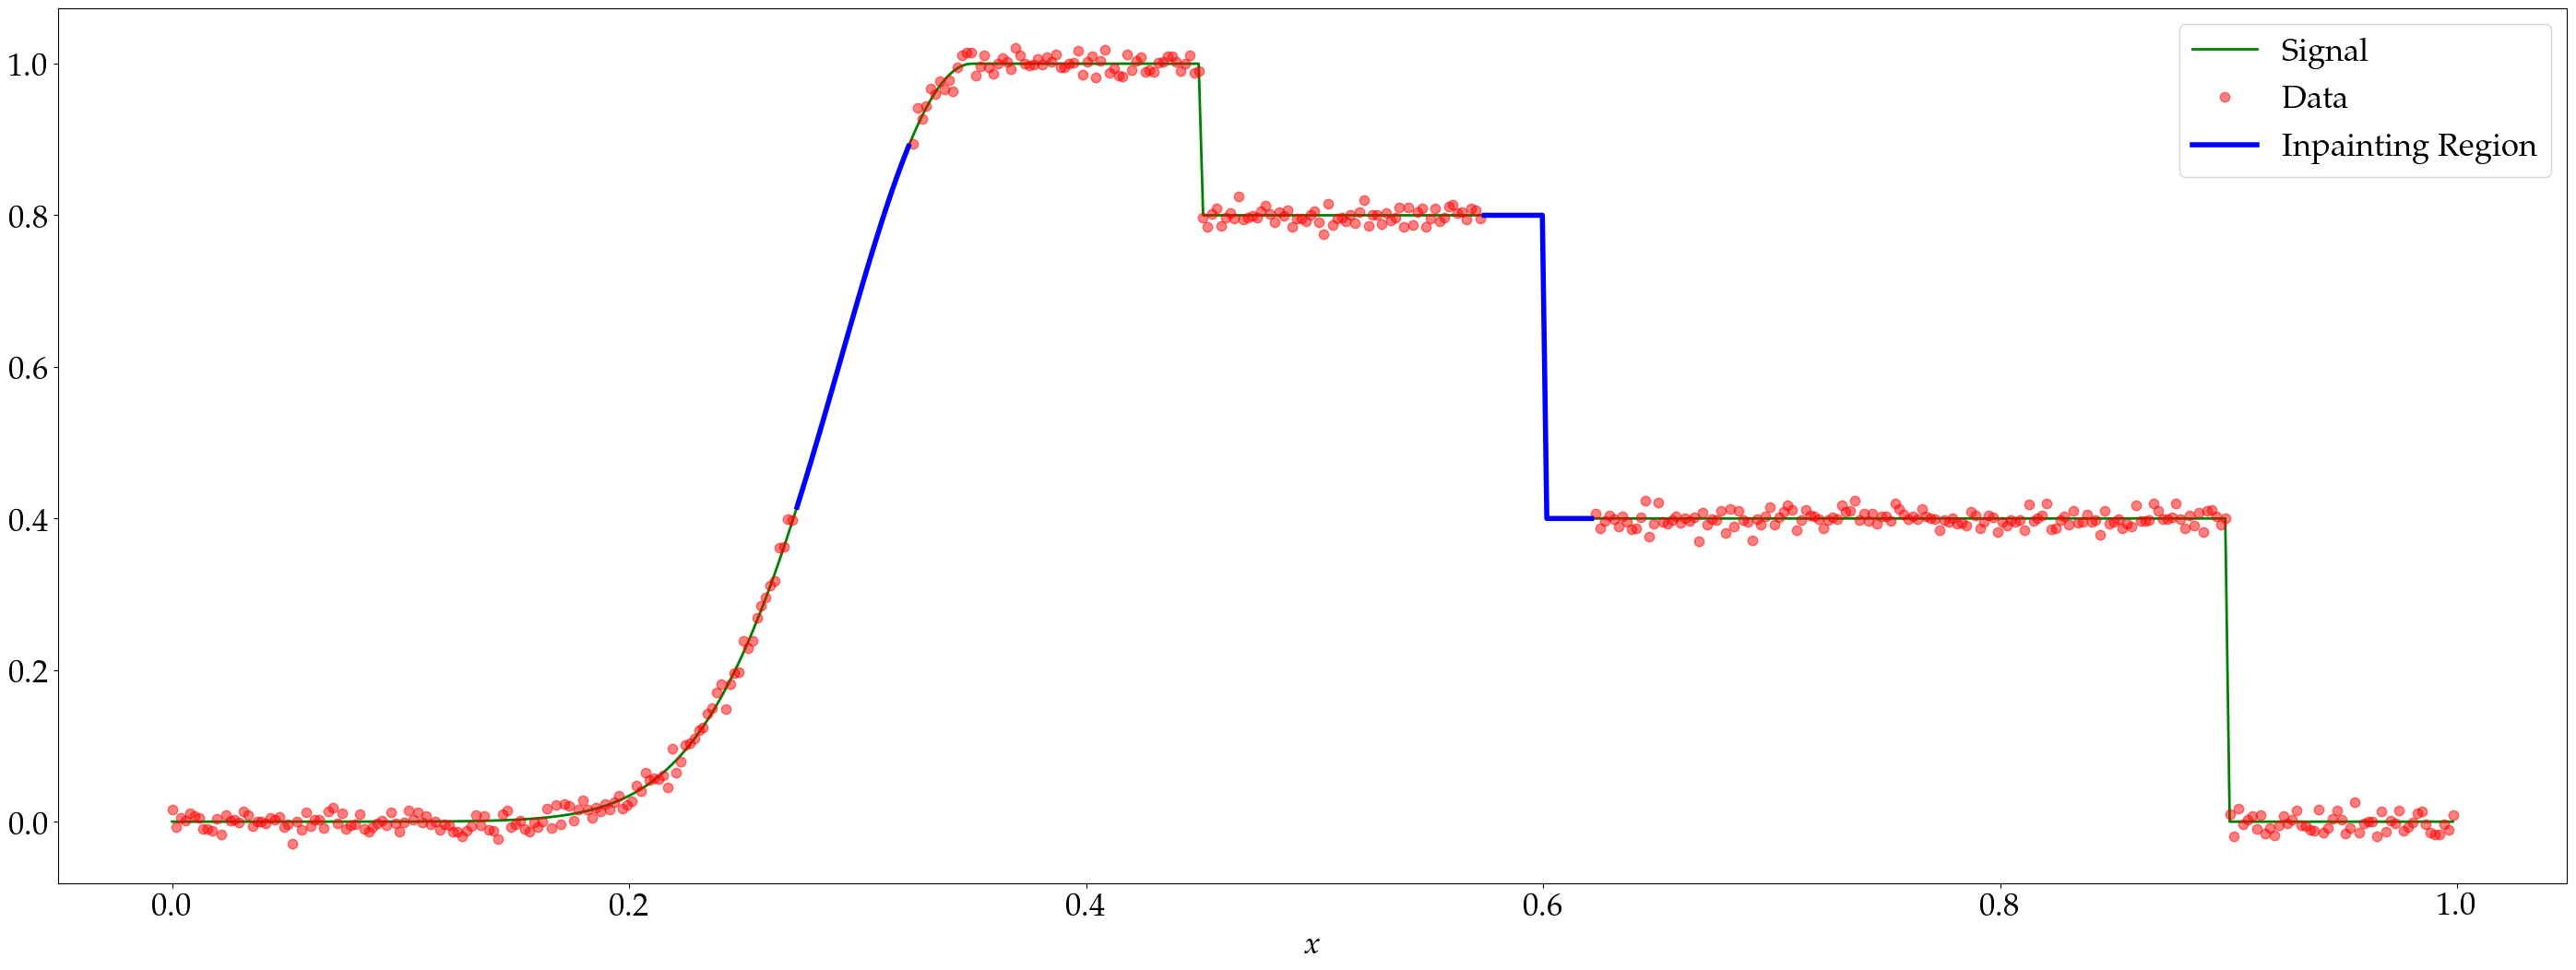

In [2]:
x = np.linspace(0,1,2**9,endpoint=False)
Signal = np.load("Inpainting_Plot_Data/Inpainting_signal.npy")
Data = np.load("Inpainting_Plot_Data/Inpainting_data.npy")
Region1 = np.load("Inpainting_Plot_Data/Inpainting_region1.npy")
Region2 = np.load("Inpainting_Plot_Data/Inpainting_region2.npy")
Region = np.concatenate((Region1,Region2))
Region_Remain = np.setdiff1d(np.arange(0,2**9,1),Region)
plt.figure(figsize=(71.2*cm_to_in,27*cm_to_in), layout="constrained")
x = np.linspace(0,1,512,endpoint=False)
plt.plot(x,Signal,label=r'Signal',linewidth=2,color='green')
plt.plot(x[Region_Remain],Data,'.',label=r'Data',color='red',markersize=15, alpha=0.5)
plt.plot(x[Region1],Signal[Region1],linewidth=4.0,color='blue', label=r'Inpainting Region')
plt.plot(x[Region2],Signal[Region2],linewidth=4.0, color='blue')
plt.legend(fontsize=25)
plt.xlabel(r'$x$',fontsize=25)
plt.tight_layout()
plt.savefig('data_inpainting.pdf', dpi=300)


C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1782469238.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


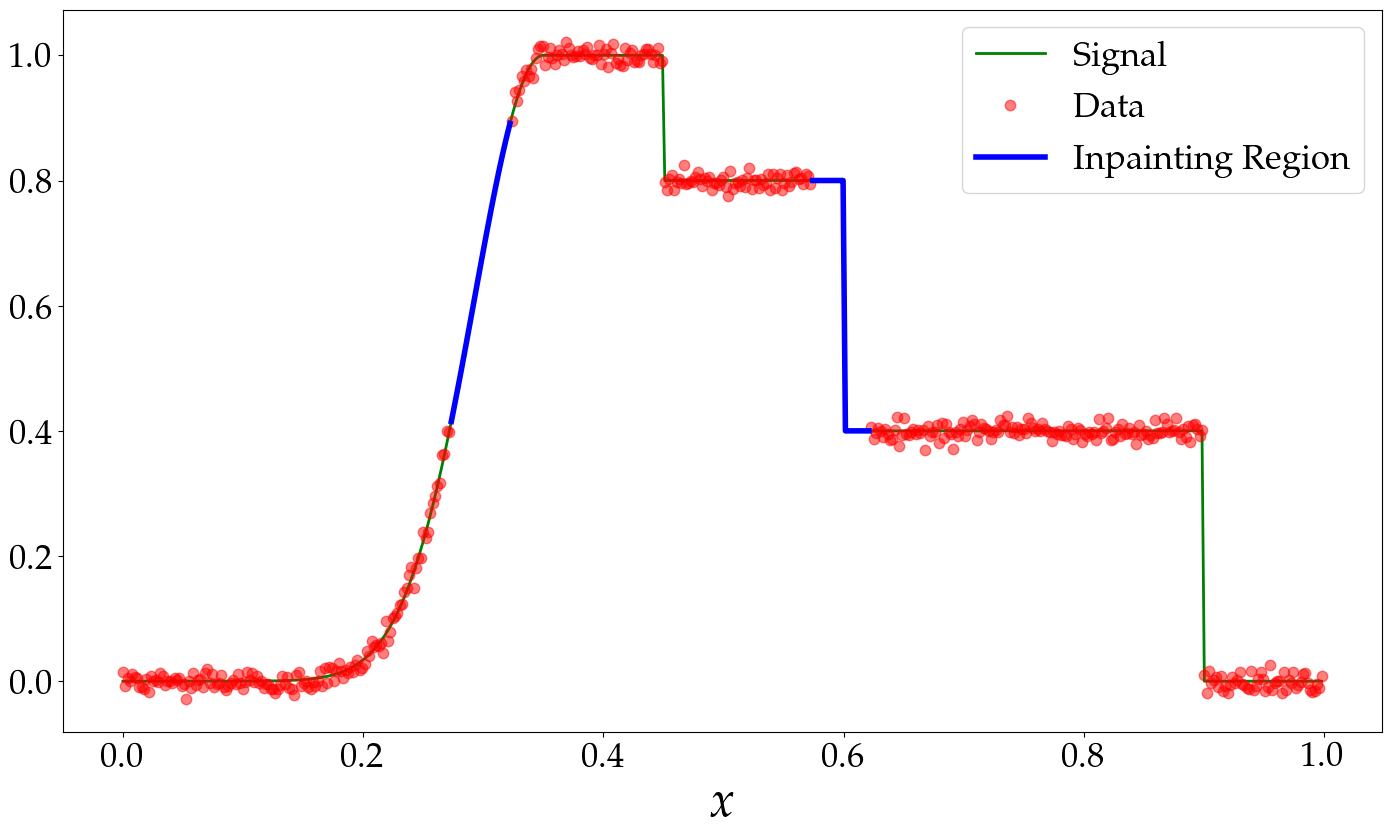

In [3]:
x = np.linspace(0,1,2**9,endpoint=False)
Signal = np.load("Inpainting_Plot_Data/Inpainting_signal.npy")
Data = np.load("Inpainting_Plot_Data/Inpainting_data.npy")
Region1 = np.load("Inpainting_Plot_Data/Inpainting_region1.npy")
Region2 = np.load("Inpainting_Plot_Data/Inpainting_region2.npy")
Region = np.concatenate((Region1,Region2))
Region_Remain = np.setdiff1d(np.arange(0,2**9,1),Region)
plt.figure(figsize=(71.2/2*cm_to_in,27/1.25*cm_to_in), layout="constrained")
x = np.linspace(0,1,512,endpoint=False)
plt.plot(x,Signal,label=r'Signal',linewidth=2,color='green')
plt.plot(x[Region_Remain],Data,'.',label=r'Data',color='red',markersize=15, alpha=0.5)
plt.plot(x[Region1],Signal[Region1],linewidth=4.0,color='blue', label=r'Inpainting Region')
plt.plot(x[Region2],Signal[Region2],linewidth=4.0, color='blue')
plt.legend(fontsize=25)
plt.xlabel(r'$x$',fontsize=35)
plt.tight_layout()
plt.savefig('data_inpainting_poster.pdf', dpi=300)

Loading Samples, Computing estimates, and plotting estimates.

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1361373961.py:13: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1361373961.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


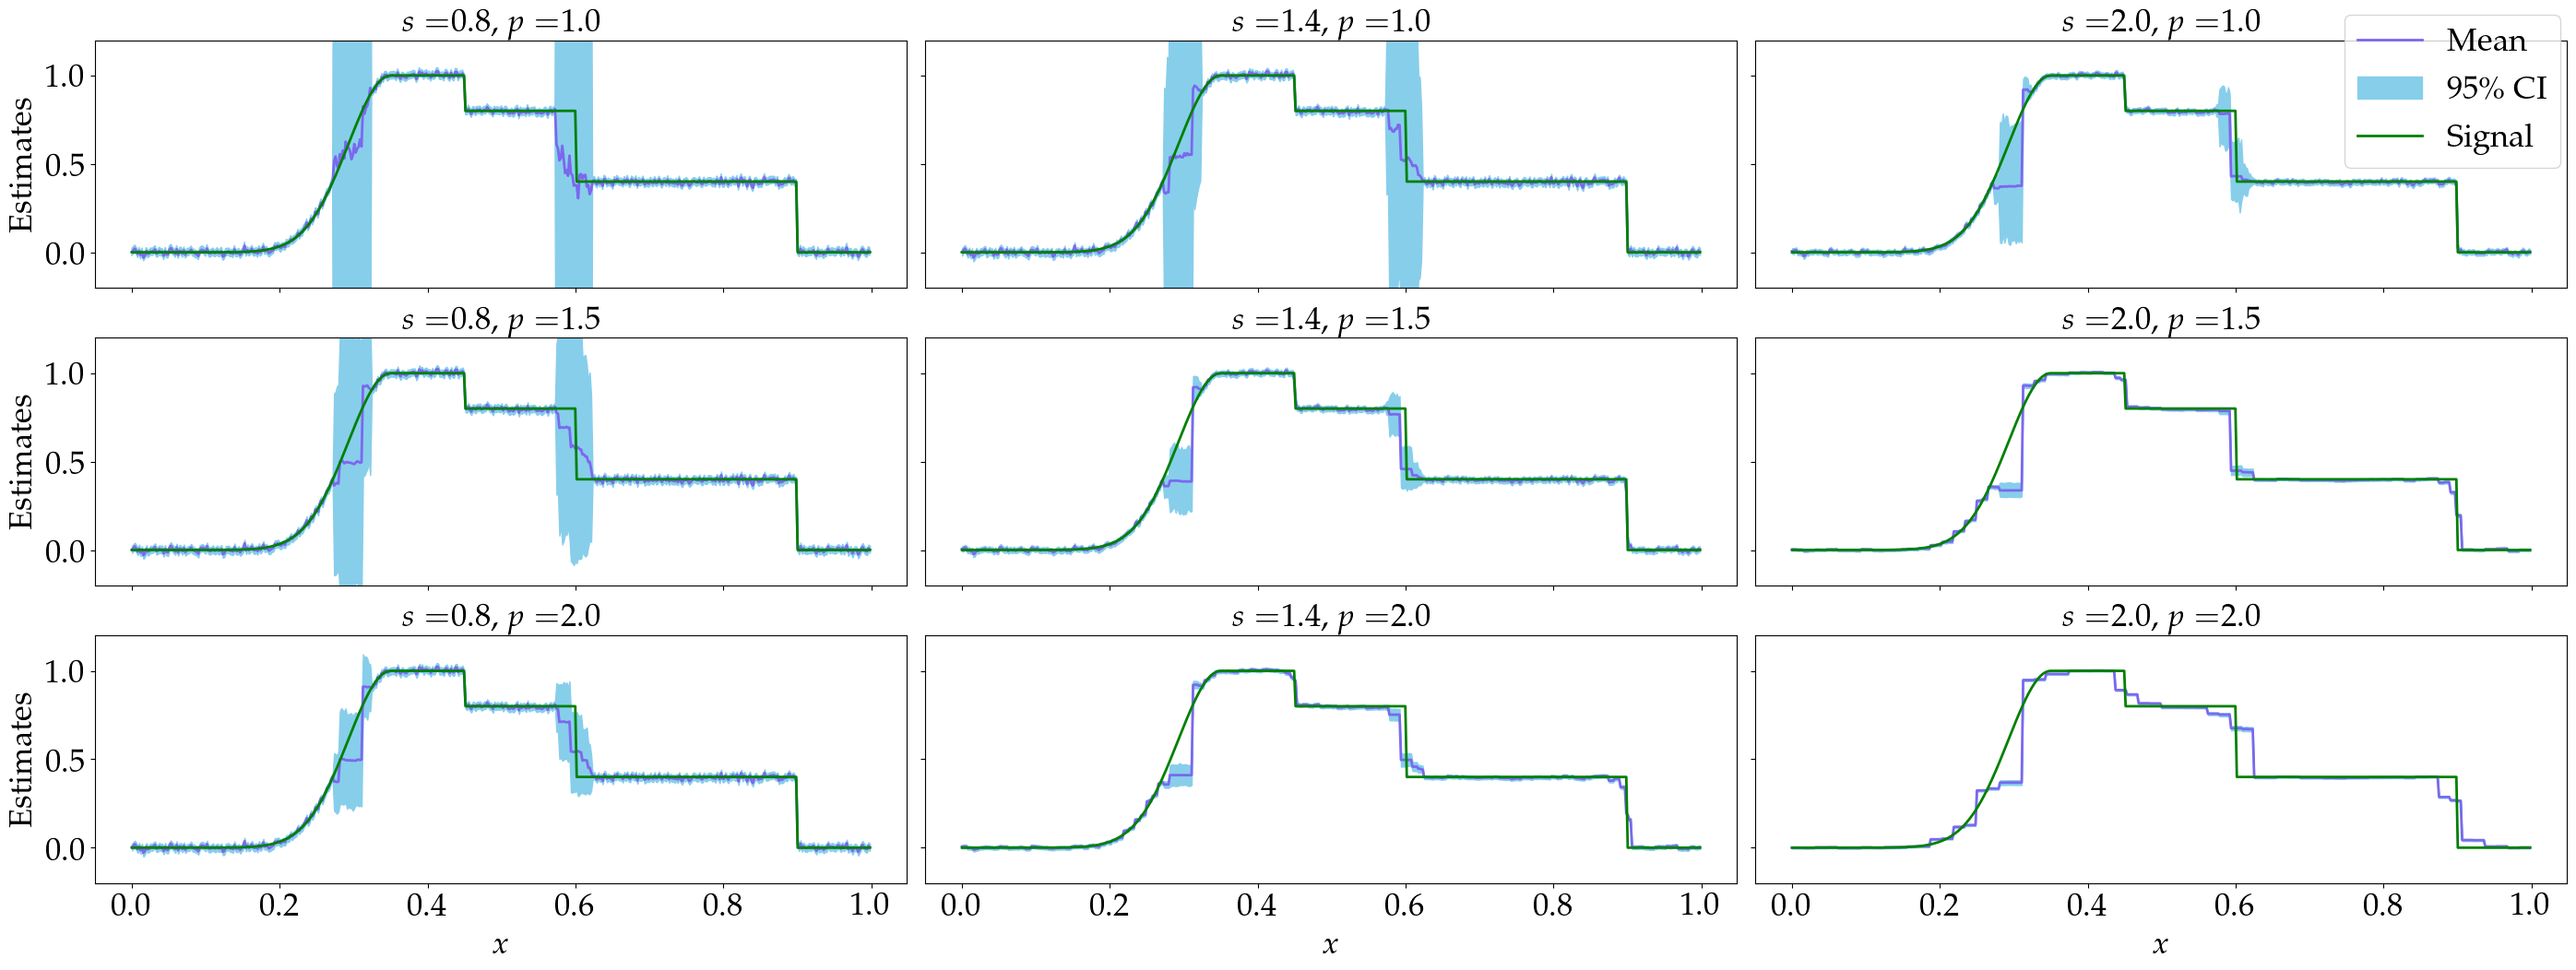

In [4]:
# Besov parameters
#s = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
s = [0.8, 1.4, 2.0]
p = [1.0, 1.5, 2.0]
# Haar wavelet case
wavelet = 'db1'
f,axes = plt.subplots(len(p),len(s), sharex=True,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
for i in range(len(p)):
    for j in range(len(s)):
        Samples = np.load("Inpainting_Plot_Data/"+ wavelet + str(s[j]) + str(p[i]) + "Inpainting_samples.npy")
        index_accept = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_index_accept.npy")
        Mean = np.mean(Samples[:,index_accept],axis=1)
        UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
        axes[i,j].plot(x,Mean,linewidth=2,color='mediumslateblue',label=r'Mean')
        axes[i,j].fill_between(x,UQ[:,0],UQ[:,1], color='skyblue', label=r'95\% CI')
        axes[i,j].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
        axes[i,j].set_ylim([-0.2,1.2])
        axes[i,j].set_title(r'$s=${}, '.format(s[j]) + r'$p=${}'.format(p[i]), fontsize=25)
        if j==0:
            axes[i,j].set_ylabel(r'Estimates', fontsize=25)
        if i== 2:    
            axes[i,j].set_xlabel(r'$x$',fontsize=25)
plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
#f.legend(handles, labels, loc='upper right', ncol=3, fontsize=20)
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('uq_Haar_Inpainting.pdf',dpi = 300)

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\918245523.py:12: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\918245523.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


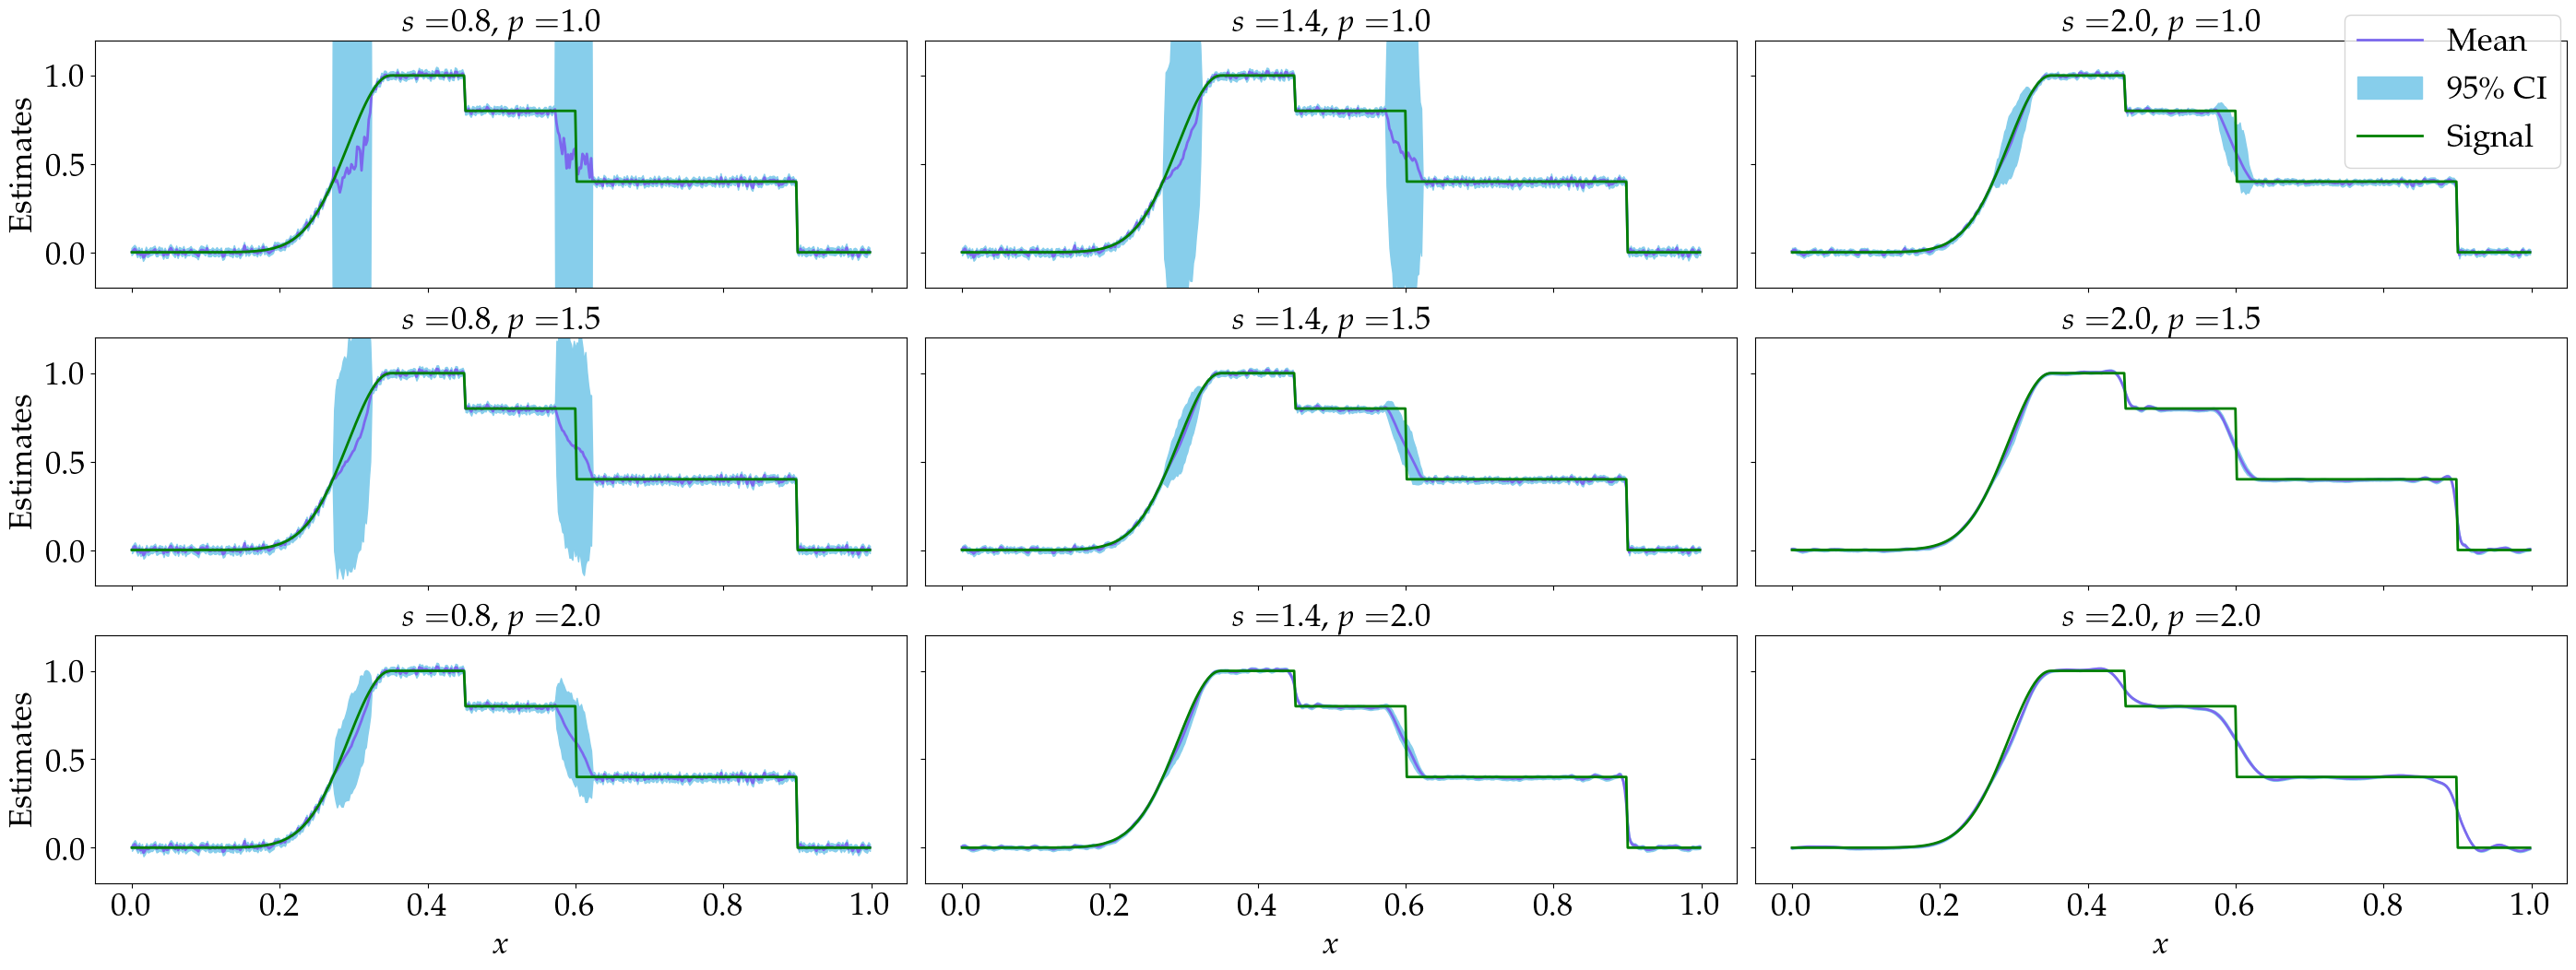

In [5]:
# Daubechies 8 wavelet case
s = [0.8, 1.4, 2.0]
p = [1.0, 1.5, 2.0]
# Haar wavelet case
wavelet = 'db8'
f,axes = plt.subplots(len(p),len(s), sharex=True,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
for i in range(len(p)):
    for j in range(len(s)):
        Samples = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_samples.npy")
        index_accept = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_index_accept.npy")
        Mean = np.mean(Samples[:,index_accept],axis=1)
        UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
        axes[i,j].plot(x,Mean,linewidth=2,color='mediumslateblue',label=r'Mean')
        axes[i,j].fill_between(x,UQ[:,0],UQ[:,1], color='skyblue', label=r'95\% CI')
        axes[i,j].plot(x,Signal, linewidth=2,label=r'Signal', color='green')
        axes[i,j].set_ylim([-0.2,1.2])
        axes[i,j].set_title(r'$s=${}, '.format(s[j]) + r'$p=${}'.format(p[i]), fontsize=25)
        if j==0:
            axes[i,j].set_ylabel(r'Estimates', fontsize=25)
        if i== 2:    
            axes[i,j].set_xlabel(r'$x$',fontsize=25)
plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('uq_db8_Inpainting.pdf',dpi = 300)

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1938131387.py:12: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\1938131387.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


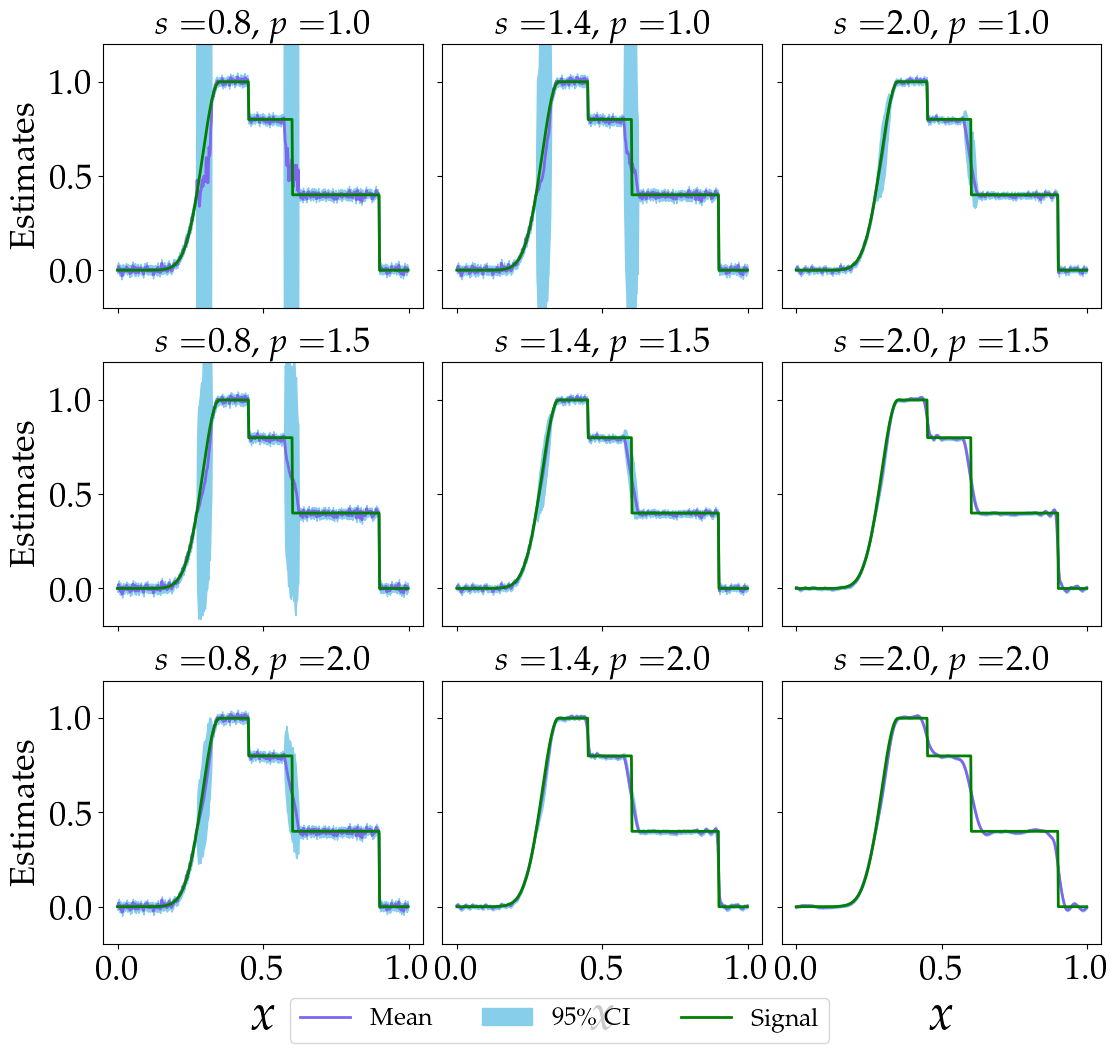

In [6]:
# Daubechies 8 wavelet case
s = [0.8, 1.4, 2.0]
p = [1.0, 1.5, 2.0]
# Haar wavelet case
wavelet = 'db8'
f,axes = plt.subplots(len(p),len(s), sharex=True,sharey=True, figsize=(71.2/2.5*cm_to_in, 27.0*cm_to_in), layout="constrained")
for i in range(len(p)):
    for j in range(len(s)):
        Samples = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_samples.npy")
        index_accept = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_index_accept.npy")
        Mean = np.mean(Samples[:,index_accept],axis=1)
        UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
        axes[i,j].plot(x,Mean,linewidth=2,color='mediumslateblue',label=r'Mean')
        axes[i,j].fill_between(x,UQ[:,0],UQ[:,1], color='skyblue', label=r'95\% CI')
        axes[i,j].plot(x,Signal, linewidth=2,label=r'Signal', color='green')
        axes[i,j].set_ylim([-0.2,1.2])
        axes[i,j].set_title(r'$s=${}, '.format(s[j]) + r'$p=${}'.format(p[i]), fontsize=25)
        if j==0:
            axes[i,j].set_ylabel(r'Estimates', fontsize=25)
        if i== 2:    
            axes[i,j].set_xlabel(r'$x$',fontsize=35)
plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='lower center', ncol=3, fontsize=18)
plt.savefig('uq_db8_Inpainting_poster.pdf',dpi = 300)

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\555644925.py:6: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\555644925.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)


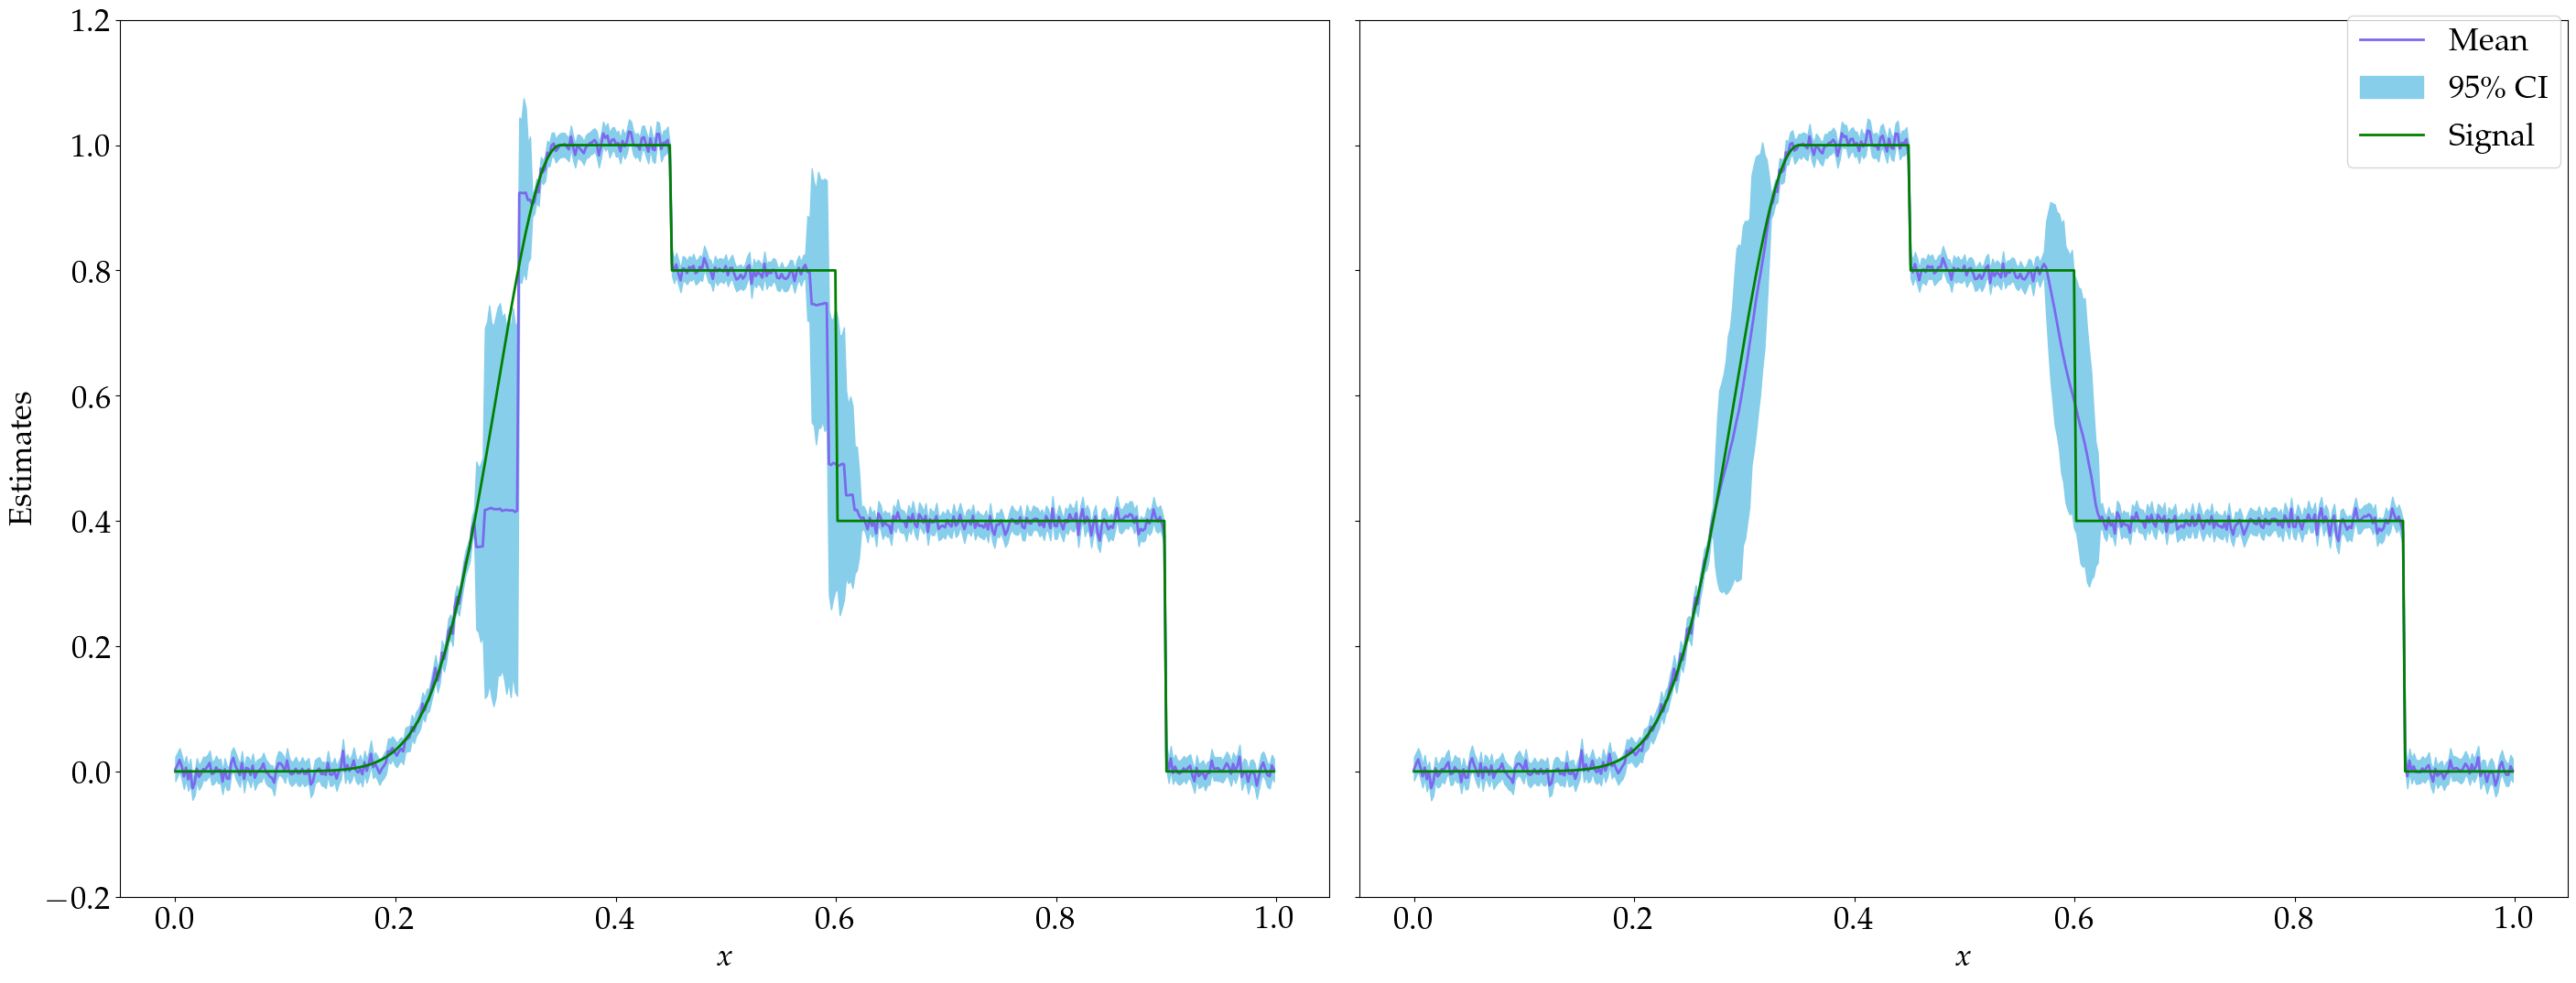

In [7]:
s = [1.2]
p = [1.5]
Samples_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_Haar = np.mean(Samples_Haar[:,index_accept_Haar],axis=1)
UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
Samples_db8 = np.load("Inpainting_Plot_Data/" + 'db8' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_db8 = np.load("Inpainting_Plot_Data/" + 'db8' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_db8 = np.mean(Samples_db8[:,index_accept_db8],axis=1)
UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)
f,axes = plt.subplots(1,2,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
axes[0].plot(x,Mean_Haar,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[0].fill_between(x,UQ_Haar[:,0],UQ_Haar[:,1], color='skyblue', label=r'95\% CI')
axes[0].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[1].plot(x,Mean_db8,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[1].fill_between(x,UQ_db8[:,0],UQ_db8[:,1], color='skyblue', label=r'95\% CI')
axes[1].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[0].set_xlabel(r'$x$',fontsize=25)
axes[1].set_xlabel(r'$x$',fontsize=25)
axes[0].set_ylabel(r'Estimates',fontsize=25)
axes[0].set_ylim([-0.2,1.2])
axes[1].set_ylim([-0.2,1.2])
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('uq_Haar_db8_Inpainting.pdf',dpi = 300)


C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\50138652.py:6: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\50138652.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)


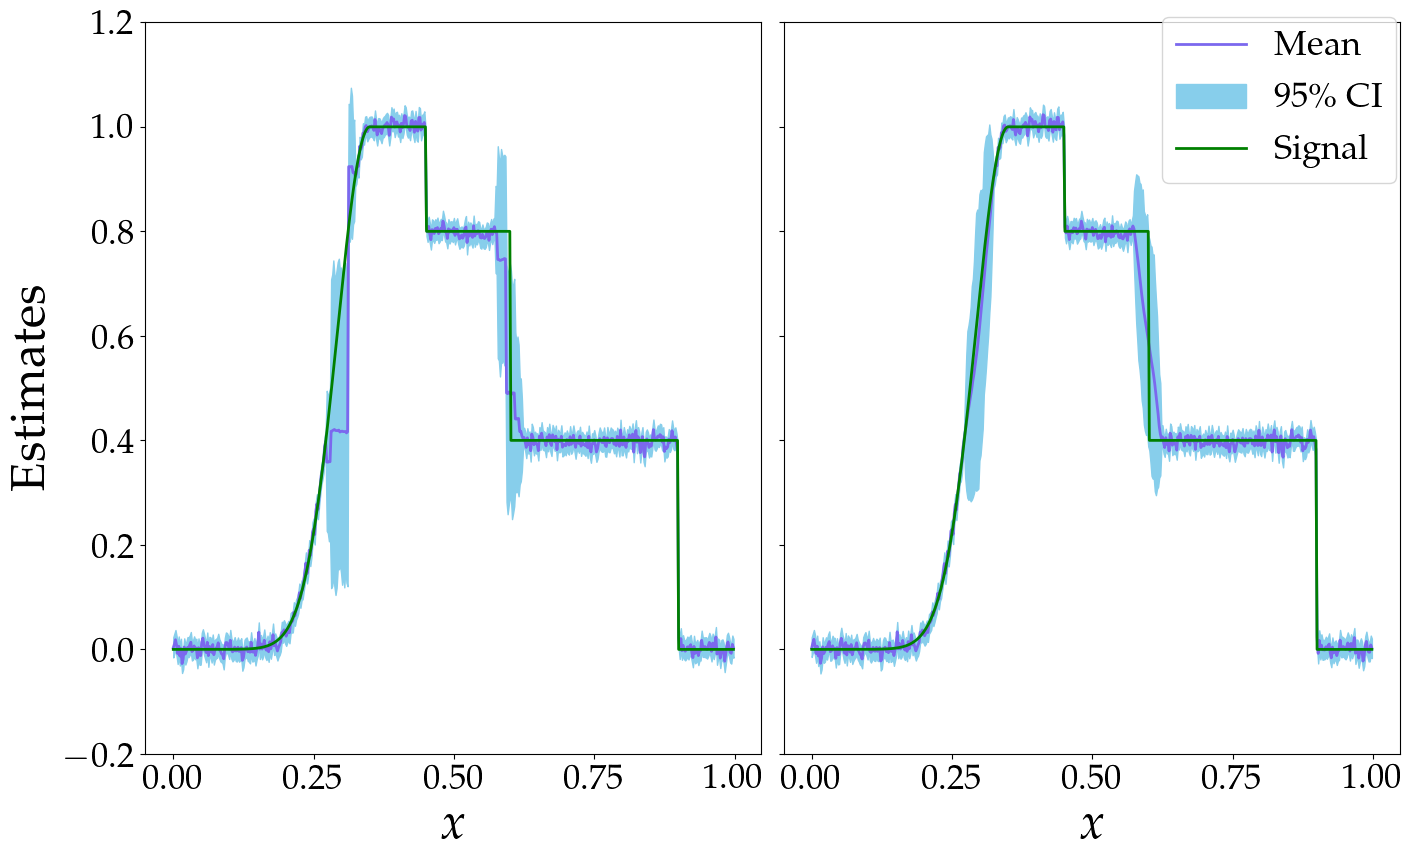

In [8]:
s = [1.2]
p = [1.5]
Samples_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_Haar = np.mean(Samples_Haar[:,index_accept_Haar],axis=1)
UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
Samples_db8 = np.load("Inpainting_Plot_Data/" + 'db8' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_db8 = np.load("Inpainting_Plot_Data/" +'db8' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_db8 = np.mean(Samples_db8[:,index_accept_db8],axis=1)
UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)
f,axes = plt.subplots(1,2,sharey=True, figsize=(71.2/2*cm_to_in, 27.0/1.25*cm_to_in), layout="constrained")
axes[0].plot(x,Mean_Haar,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[0].fill_between(x,UQ_Haar[:,0],UQ_Haar[:,1], color='skyblue', label=r'95\% CI')
axes[0].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[1].plot(x,Mean_db8,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[1].fill_between(x,UQ_db8[:,0],UQ_db8[:,1], color='skyblue', label=r'95\% CI')
axes[1].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[0].set_xlabel(r'$x$',fontsize=35)
axes[1].set_xlabel(r'$x$',fontsize=35)
axes[0].set_ylabel(r'Estimates',fontsize=35)
axes[0].set_ylim([-0.2,1.2])
axes[1].set_ylim([-0.2,1.2])
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('uq_Haar_db8_Inpainting_poster.pdf',dpi = 300)